In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
'''
@File    :   gru_fc.ipynb
@Time    :   2024/05/20
@Author  :   LI YIMING 
@Version :   1.0
@Site    :   https://github.com/Mingg817
@Desc    :   gru_fc训练notebook
'''

In [7]:
import sys
import os

# 获取项目的根目录路径
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# 将项目根目录添加到sys.path
if project_root not in sys.path:
    sys.path.append(project_root)

In [8]:
from torch import nn,optim

In [9]:
from datasets import load_dataset
import os

train_file = []
test_file = []
for file in os.listdir("../dataset"):
    if file.endswith("news.parquet"):
        if "train" in file:
            train_file.append(os.path.join("../dataset", file))
        if "test" in file:
            test_file.append(os.path.join("../dataset", file))


dataset = load_dataset("parquet", data_files={"train": train_file, "test": test_file})
dataset.set_format("torch", columns=["x", "y_hat", "y_avg","x_news","y_news"],output_all_columns=True)

In [10]:
dataset

DatasetDict({
    train: Dataset({
        features: ['start_date', 'ts_code', 'x', 'y_hat', 'y_avg', 'x_news', 'y_news', 'window_size'],
        num_rows: 749
    })
    test: Dataset({
        features: ['start_date', 'ts_code', 'x', 'y_hat', 'y_avg', 'x_news', 'y_news', 'window_size'],
        num_rows: 42
    })
})

In [11]:
from module.GRU_FC import GRU_FC
gru = GRU_FC(hidden_size=32, num_layers=4).to("cuda")

In [12]:
from torchsummary import summary
summary(gru, input_size=(32,),batch_size=128)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
               GRU-1  [[-1, 32, 32], [-1, 2, 32]]               0
            Linear-2                   [128, 1]              33
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.50
Params size (MB): 0.00
Estimated Total Size (MB): 0.52
----------------------------------------------------------------


train loss 0.002034, test loss 0.003700


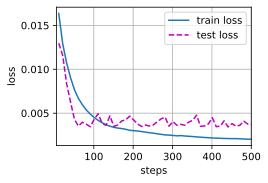

In [13]:
from trainer import GRU_FC_trainer

optimizer = optim.Adam(gru.parameters(), lr=0.0001)
loss_fn = nn.MSELoss()

GRU_FC_trainer(
    model=gru,
    dataset=dataset,
    num_steps=500,
    batch_size=8,
    optimizer=optimizer,
    loss_fn=loss_fn,
    forcast_length=3,
    test_loss_sample_rate=10,
)

Text(152.16666666666669, 0.5, 'num_layer')

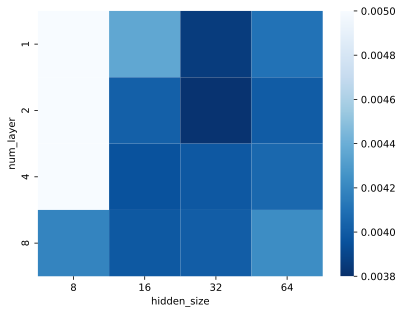

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame(
    [
        [0.124721, 0.004361, 0.003860, 0.004107],
        [0.080830, 0.004024, 0.003818, 0.004005],
        [0.028030, 0.003956, 0.003987, 0.004061],
        [0.004187, 0.003991, 0.004007, 0.004228],
    ],
    index=["1", "2", "4", "8"],  # DataFrame的行标签设置为大写字母
    columns=['8','16','32','64'],
)  # 设置DataFrame的列标签

plt.figure(dpi=300)
sns.heatmap(
    data=df,vmin=0.0038,vmax=0.005,cmap='Blues_r'# 矩阵数据集，数据的index和columns分别为heatmap的y轴方向和x轴方向标签
)

plt.xlabel('hidden_size')  # 设置x轴标签
plt.ylabel('num_layer')     # 设置y轴标签
# plt.title("所有参数默认")